In [2]:
import requests
import pprint
import pandas as pd
from collections import Counter

pp = pprint.PrettyPrinter(indent=4)
api_key = 'RGAPI-88ac3bfa-6138-474a-9fe0-83d835caaa57'
game_id = 'KR_6261112670'
lines = ['TOP', 'BOTTOM', 'MIDDLE', 'JUNGLE', 'UTILITY']

request_header={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": api_key
}

def get_match_v5_orderby_kda(game_id):
    summoner_api = 'https://asia.api.riotgames.com/lol/match/v5/matches/' + game_id
    r = requests.get(summoner_api,headers=request_header)
    df=pd.DataFrame(r.json())
    part_df = pd.DataFrame(df['info']['participants']);

    # 조건 : 이겼는가
    is_win = part_df['win']==True
    rank = dict()
    # 라인별 KDA 구하기
    for line in lines:
        doco_line = part_df['individualPosition']==line
        kda = pd.DataFrame(part_df[is_win & doco_line])['challenges'].iloc[0]['kda']
        rank[line] = kda
    return rank

result = dict()

# TODO :: range 대신 game id 리스트로 수정
for _ in range(10):
    result = dict(Counter(result)+Counter(get_match_v5_orderby_kda(game_id)))

# 라인별 KDA 정렬하기
result = dict(sorted(result.items(), key = lambda item: item[1], reverse = True))
result

{'BOTTOM': 60,
 'MIDDLE': 43.99999999999999,
 'TOP': 30,
 'UTILITY': 26.666666666666668,
 'JUNGLE': 26.000000000000004}

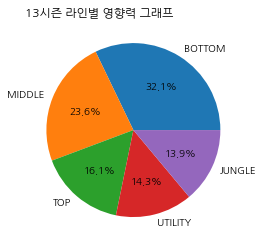

In [3]:
import matplotlib.pyplot as plt

labels = []
ratio = []
season = "13"

for key, val in result.items():
    labels.append(key)
    ratio.append(val)
plt.rc('font', family='NanumGothic')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title(label=f"{season}시즌 라인별 영향력 그래프",
          loc="left",
          fontstyle='italic')
plt.show()